<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

import sympy
from sympy import gamma
sympy.init_printing()
pi = sympy.pi

# Part 2

## Define Function

In [3]:
def f(x):
    return np.exp(-1/x)

x = np.linspace(0.001, 1, 100)
approx = f(x)

## Plot Function

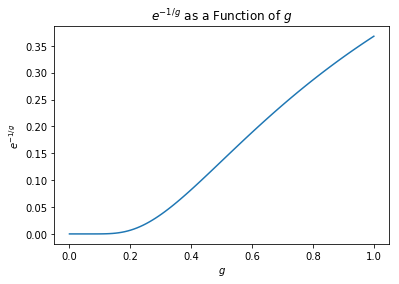

In [4]:
fig = plt.figure()

plt.plot(x, approx)
plt.xlabel('$g$')
plt.ylabel('$e^{-1/g}$')
plt.title('$e^{-1/g}$ as a Function of $g$')

plt.show()

As shown in the written work, the Taylor Series for this function about $g=0$ is

$$f(g)=0 $$

This corresponds to small values of $g$ on the plot above.

# Part 3

## The Brute Force Method

In [5]:
x = sympy.symbols('x')
poly_terms = np.array([0])

### Functions Used

These functions are used to multiply large polynomials together and determine the coefficients $c_n$ using a heavily computational brute force approach.

In [6]:
def n_term(n):
    return (1/sympy.factorial(n))*(-1)**n

def get_polynomial(x, poly_terms):
    polynomial = 0
    for (i,p_i) in enumerate(poly_terms):
        polynomial += p_i*x**i
    return polynomial

def append_pn(poly_terms, n):
    polynomial = get_polynomial(x, poly_terms)
    G = 0
    for i in range(n):
        G += n_term(i)*(polynomial)**i
    G *= x
    G.simplify()
    G = sympy.Poly(G)
    return np.append(poly_terms, G.all_coeffs()[-1-n])

def get_n_terms(poly_terms, n):
    for i in range(n):
        poly_terms = append_pn(poly_terms, i+1)
    return poly_terms

The first ten terms are shown below (the sympy package can't seem to handle the large polynomials involved for n>10).

In [7]:
poly_terms = get_n_terms(poly_terms, 10)
poly_terms

array([0, 1, -1, 3/2, -8/3, 125/24, -54/5, 16807/720, -16384/315,
       531441/4480, -156250/567], dtype=object)

## The Smart Way, Closed Form Potential Solution

The function below defines what we have shown $c_n$ to be

$$c_n =\frac{(-1)^{n+1}n^{n-2}}{(n-1)!} $$

In [8]:
def cn(n):
    return (n**(n-2))*((-1)**(n+1))/(sympy.factorial(n-1))

Obtain and print the values of $c_n$.

In [19]:
n = np.linspace(1, 100, 100, dtype='float')
poly_terms = [cn(i) for i in n]

for i in range(100):
    print('Term {}:  '.format(i+1)+str(poly_terms[i]))

Term 1:  1.00000000000000
Term 2:  -1.00000000000000
Term 3:  1.50000000000000
Term 4:  -2.66666666666667
Term 5:  5.20833333333333
Term 6:  -10.8000000000000
Term 7:  23.3430555555556
Term 8:  -52.0126984126984
Term 9:  118.625223214286
Term 10:  -275.573192239859
Term 11:  649.787172343474
Term 12:  -1551.16051948052
Term 13:  3741.44970295924
Term 14:  -9104.50024115802
Term 15:  22324.3085127066
Term 16:  -55103.6219729038
Term 17:  136808.860903943
Term 18:  -341422.050665838
Term 19:  855992.965996608
Term 20:  -2154990.20609109
Term 21:  5445552.92231446
Term 22:  -13807330.0021666
Term 23:  35117044.9851392
Term 24:  -89568002.5610280
Term 25:  229041684.618795
Term 26:  -587103504.117180
Term 27:  1508256053.85779
Term 28:  -3882630161.29319
Term 29:  10013943136.6548
Term 30:  -25873567362.6576
Term 31:  66962097093.5807
Term 32:  -173571165959.920
Term 33:  450568046564.235
Term 34:  -1171223178256.49
Term 35:  3048462517882.45
Term 36:  -7944240398206.81
Term 37:  207264628